In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smfrmla
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import tukeyhsd
import statsmodels.api as sm
import pylab
import warnings
warnings.filterwarnings('ignore')

# turn of data table rendering
pd.set_option('display.notebook_repr_html', True)
sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.20.2'

In [2]:
data=pd.read_csv("rcbd1.csv")


In [3]:
data.head()

,treatment,rep,gy
0,1,1,5113
1,1,2,5398
2,1,3,5307
3,1,4,4678
4,2,1,5346


In [4]:
data.tail()

,treatment,rep,gy
19,5,4,4748
20,6,1,5254
21,6,2,4542
22,6,3,4919
23,6,4,4098


In [5]:
data.gy.describe()
#data.describe()

count      24.000000
mean     4959.583333
std       456.883004
min      4098.000000
25%      4708.750000
50%      4883.500000
75%      5280.750000
max      5952.000000
Name: gy, dtype: float64

<AxesSubplot:>

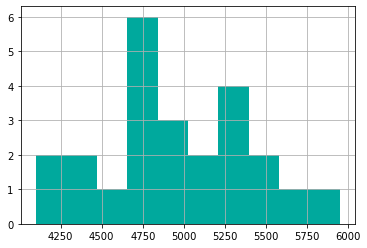

In [6]:
data.gy.hist()

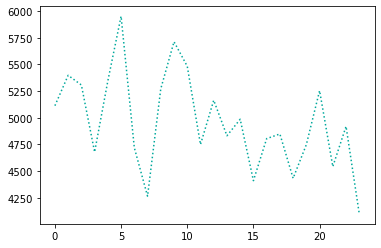

In [7]:
plt.plot(data['gy'], linestyle = 'dotted')
plt.show()

<AxesSubplot:xlabel='gy'>

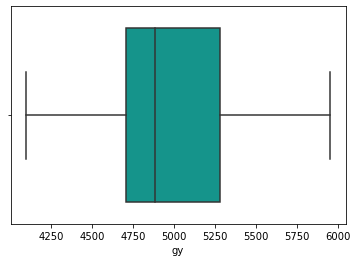

In [8]:
sns.boxplot("gy", data=data)

<AxesSubplot:xlabel='treatment', ylabel='gy'>

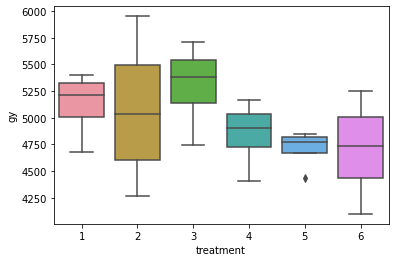

In [9]:
sns.boxplot(data["treatment"],data['gy'])

<AxesSubplot:xlabel='rep', ylabel='gy'>

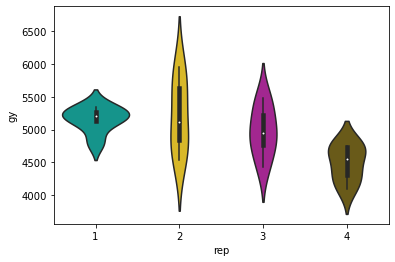

In [10]:
sns.violinplot('rep' ,'gy', data=data)

### Special tests for normal distributions
Since the normal distribution is the most common distribution in statistics, there are several additional functions available to test whether a sample could have been drawn from a normal distribution.

First, we can test if skew and kurtosis of our sample differ significantly from those of a normal distribution:

In [12]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(data['gy']))

print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(data['gy']))


normal skewtest teststat =  0.420 pvalue = 0.6745
normal kurtosistest teststat = -0.082 pvalue = 0.9346


#### These two tests are combined in the normality test

In [13]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(data['gy']))

normaltest teststat =  0.183 pvalue = 0.9125


In all three tests, the p-values are very high and we cannot reject the hypothesis that the our sample has skew and kurtosis of the normal distribution.

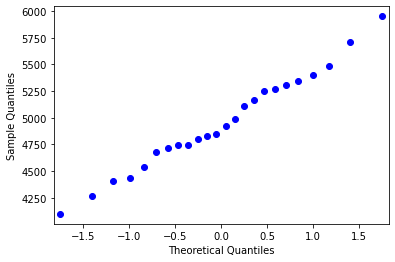

In [14]:
sm.qqplot(data['gy'])
pylab.show()

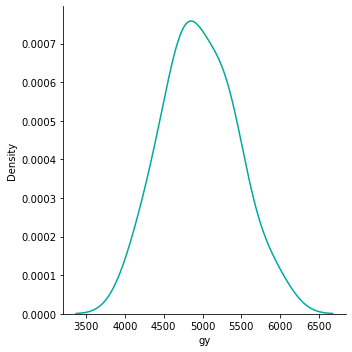

In [15]:
sns.displot(data, x="gy", kind="kde")#,hue='treatment')


In [16]:

model = smfrmla.ols('gy ~C(rep)+C(treatment)', data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                     gy   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     3.553
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0165
Time:                        17:09:27   Log-Likelihood:                -167.77
No. Observations:                  24   AIC:                             353.5
Df Residuals:                      15   BIC:                             364.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5323.2500    203.61

In [17]:
aov = sm.stats.anova_lm(model, typ=3) # Type 2 ANOVA DataFrame
print(aov)

                    sum_sq    df           F        PR(>F)
Intercept     7.556531e+07   1.0  683.487646  6.314085e-14
C(rep)        1.944361e+06   3.0    5.862243  7.415778e-03
C(treatment)  1.198331e+06   5.0    2.167779  1.128094e-01
Residual      1.658376e+06  15.0         NaN           NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     1      2   -53.75    0.9 -1059.1526  951.6526  False
     1      3   180.25    0.9  -825.1526 1185.6526  False
     1      4  -276.25    0.9 -1281.6526  729.1526  False
     1      5   -416.0 0.7495 -1421.4026  589.4026  False
     1      6  -420.75 0.7415 -1426.1526  584.6526  False
     2      3    234.0    0.9  -771.4026 1239.4026  False
     2      4   -222.5    0.9 -1227.9026  782.9026  False
     2      5  -362.25 0.8403 -1367.6526  643.1526  False
     2      6   -367.0 0.8323 -1372.4026  638.4026  False
     3      4   -456.5 0.6811 -1461.9026  548.9026  False
     3      5  -596.25 0.4435 -1601.6526  409.1526  False
     3      6   -601.0 0.4352 -1606.4026  404.4026  False
     4      5  -139.75    0.9 -1145.1526  865.6526  False
     4      6   -144.5    0.9 -1149.9026  860.9026  False
     5      6 

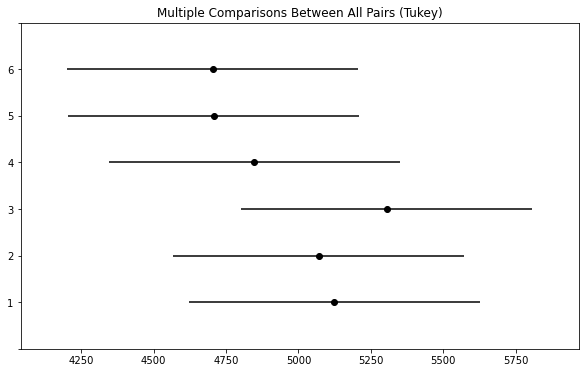

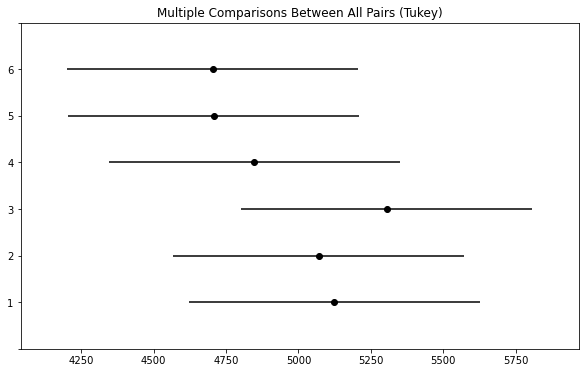

In [18]:
Tukey_HSD = pairwise_tukeyhsd(data['gy'],data['treatment'],alpha=0.05)
print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()